In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Import data and explore

In [2]:
cases = pd.read_csv('data/COVID_CountByZipPerDate 03292021.csv')
cases.head(5)

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


In [3]:
vaccines = pd.read_csv('data/vaccine_with_protocol.csv')
vaccines.head(5)

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [4]:
pop = pd.read_csv('data/pop_by_zip.csv')

In [5]:
pop.head(5)

,Zip,Location,Population,Den
0,37212,"36.133973, -86.801471",18547,6556.46
1,37201,"36.165550, -86.777679",1167,3602.97
2,37206,"36.180771, -86.730153",27751,3597.99
3,37208,"36.178567, -86.805263",15272,3416.62
4,37219,"36.166457, -86.782946",830,3259.85


In [6]:
edu = pd.read_csv('data/education_by_zipa.csv')

In [7]:
edu.tail(5)

,Zip,total,none,perc_none,n_4,perc_n_4,n_4_orless,perc_n_4_orless,5_6,perc_5_6,...,master_orless,perc_master_orless,professional,perc_professional,professional_orless,perc_professional_orless,doctorate,perc_doctorate,doctorate_orless,perc_doctorate_orless
110,38552,131,4,3.05,0,0.0,4,3.05,0,0.00,...,131,100.00,0,0.00,131,100.0,0,0.0,131,100
111,38560,1042,13,1.25,0,0.0,13,1.25,14,1.34,...,1038,99.62,4,0.38,1042,100.0,0,0.0,1042,100
112,38563,2195,13,0.59,0,0.0,13,0.59,0,0.00,...,2195,100.00,0,0.00,2195,100.0,0,0.0,2195,100
113,38567,536,0,0.00,0,0.0,0,0.00,0,0.00,...,526,98.13,10,1.87,536,100.0,0,0.0,536,100
114,38569,62,0,0.00,0,0.0,0,0.00,0,0.00,...,62,100.00,0,0.00,62,100.0,0,0.0,62,100


In [8]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zip                       115 non-null    int64  
 1   total                     115 non-null    int64  
 2   none                      115 non-null    int64  
 3   perc_none                 115 non-null    float64
 4   n_4                       115 non-null    int64  
 5   perc_n_4                  115 non-null    float64
 6   n_4_orless                115 non-null    int64  
 7   perc_n_4_orless           115 non-null    float64
 8   5_6                       115 non-null    int64  
 9   perc_5_6                  115 non-null    float64
 10  5_6_orless                115 non-null    int64  
 11  perc_5_6_orless           115 non-null    float64
 12  7_8                       115 non-null    int64  
 13  perc_7_8                  115 non-null    float64
 14  7_8_orless

In [9]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Specimen Collection Date  8832 non-null   object 
 1   Zip                       8456 non-null   float64
 2   Cases                     8832 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 207.1+ KB


In [10]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


In [11]:
vaccines_clean = vaccines[vaccines['dose_nbr'] == 1]

In [12]:
vaccines['count_given'].sum()

334890.0

In [13]:
vaccines_clean['count_given'].sum()

220038.0

In [14]:
cases['Cases'].sum()

93619

Create dataframe for vaccines by zip

In [15]:
vac_by_zip = vaccines_clean.groupby('zipcode')['count_given'].sum()
df_vac_by_zip = vac_by_zip.to_frame()
df_vac_by_zip

,count_given
zipcode,
37013.0,18465.0
37027.0,352.0
37069.0,50.0
37072.0,8460.0
37076.0,11113.0
37080.0,1970.0
37115.0,8520.0
37138.0,7152.0
37189.0,1056.0


Create dataframe for cases by zip

In [16]:
cases_by_zip = cases.groupby('Zip')['Cases'].sum()
df_cases_by_zip = cases_by_zip.to_frame()
df_cases_by_zip

,Cases
Zip,
37013.0,13354
37027.0,231
37069.0,16
37072.0,2984
37076.0,4279
37080.0,574
37115.0,4574
37138.0,2359
37189.0,479


<AxesSubplot:xlabel='zipcode'>

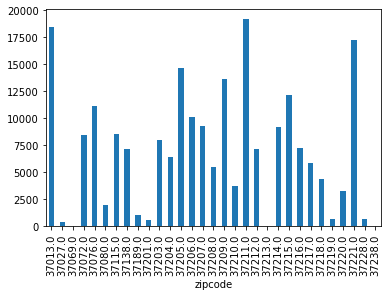

In [17]:
vac_by_zip.plot.bar()

<AxesSubplot:xlabel='Zip'>

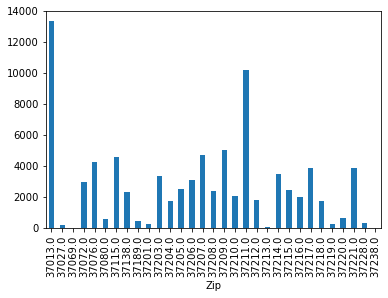

In [18]:
cases_by_zip.plot.bar()

In [19]:
top5cases = cases_by_zip.nlargest(5)
top5vaccines = vac_by_zip.nlargest(5)
bottom5cases = cases_by_zip.nsmallest(5)
bottom5vaccines = vac_by_zip.nsmallest(5)

In [20]:
bottom5vaccines

zipcode
37238.0      3.0
37069.0     50.0
37213.0     72.0
37027.0    352.0
37201.0    576.0
Name: count_given, dtype: float64

In [21]:
df_cases_by_zip.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 31 entries, 37013.0 to 37238.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Cases   31 non-null     int64
dtypes: int64(1)
memory usage: 496.0 bytes


In [22]:
df_vac_by_zip.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 31 entries, 37013.0 to 37238.0
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   count_given  31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


Bring in population

In [23]:
df_cases_by_zip = df_cases_by_zip.merge(pop, on=['Zip'], how='left')

In [24]:
df_cases_by_zip

,Zip,Cases,Location,Population,Den
0,37013.0,13354,NaN,51343.0,NaN
1,37027.0,231,NaN,35747.0,NaN
2,37069.0,16,NaN,16243.0,NaN
3,37072.0,2984,NaN,26386.0,NaN
4,37076.0,4279,NaN,29547.0,NaN
5,37080.0,574,NaN,7394.0,NaN
6,37115.0,4574,NaN,35192.0,NaN
7,37138.0,2359,NaN,22160.0,NaN
8,37189.0,479,NaN,2343.0,NaN
9,37201.0,299,"36.165550, -86.777679",1167.0,3602.97


Calculate cases per capita and add it as a column

In [25]:
df_cases_by_zip['cases_by_perc'] = 100* df_cases_by_zip['Cases'] / df_cases_by_zip['Population']

In [26]:
df_cases_by_zip['cases_by_perc'] = 100* df_cases_by_zip.apply(lambda row: float(row['Cases']) / float(row['Population']), axis=1)

In [27]:
df_cases_by_zip

,Zip,Cases,Location,Population,Den,cases_by_perc
0,37013.0,13354,NaN,51343.0,NaN,26.009388
1,37027.0,231,NaN,35747.0,NaN,0.646208
2,37069.0,16,NaN,16243.0,NaN,0.098504
3,37072.0,2984,NaN,26386.0,NaN,11.309028
4,37076.0,4279,NaN,29547.0,NaN,14.482012
5,37080.0,574,NaN,7394.0,NaN,7.763051
6,37115.0,4574,NaN,35192.0,NaN,12.997272
7,37138.0,2359,NaN,22160.0,NaN,10.645307
8,37189.0,479,NaN,2343.0,NaN,20.443875
9,37201.0,299,"36.165550, -86.777679",1167.0,3602.97,25.621251


In [28]:
df_vac_by_zip = df_vac_by_zip.merge(pop, left_on='zipcode', right_on='Zip', how='left')

In [29]:
df_vac_by_zip

,count_given,Zip,Location,Population,Den
0,18465.0,37013.0,NaN,51343.0,NaN
1,352.0,37027.0,NaN,35747.0,NaN
2,50.0,37069.0,NaN,16243.0,NaN
3,8460.0,37072.0,NaN,26386.0,NaN
4,11113.0,37076.0,NaN,29547.0,NaN
5,1970.0,37080.0,NaN,7394.0,NaN
6,8520.0,37115.0,NaN,35192.0,NaN
7,7152.0,37138.0,NaN,22160.0,NaN
8,1056.0,37189.0,NaN,2343.0,NaN
9,576.0,37201.0,"36.165550, -86.777679",1167.0,3602.97


Calculate vaccines per capita

In [30]:
df_vac_by_zip['vac_by_perc'] = df_vac_by_zip.apply(lambda row: 100* float(row['count_given']) / float(row['Population']), axis=1)

In [31]:
df_vac_by_zip

,count_given,Zip,Location,Population,Den,vac_by_perc
0,18465.0,37013.0,NaN,51343.0,NaN,35.964007
1,352.0,37027.0,NaN,35747.0,NaN,0.984698
2,50.0,37069.0,NaN,16243.0,NaN,0.307825
3,8460.0,37072.0,NaN,26386.0,NaN,32.062457
4,11113.0,37076.0,NaN,29547.0,NaN,37.611263
5,1970.0,37080.0,NaN,7394.0,NaN,26.643224
6,8520.0,37115.0,NaN,35192.0,NaN,24.210048
7,7152.0,37138.0,NaN,22160.0,NaN,32.274368
8,1056.0,37189.0,NaN,2343.0,NaN,45.070423
9,576.0,37201.0,"36.165550, -86.777679",1167.0,3602.97,49.357326


<AxesSubplot:xlabel='Zip'>

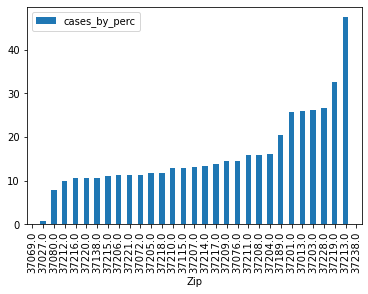

In [32]:
df_cases_by_zip = df_cases_by_zip.sort_values('cases_by_perc')
df_cases_by_zip.plot.bar(x='Zip', y='cases_by_perc')

<AxesSubplot:xlabel='Zip'>

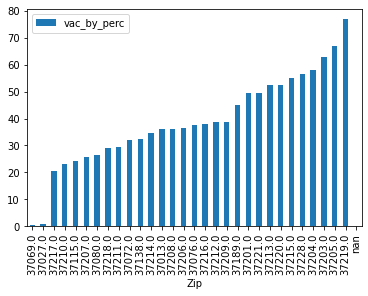

In [33]:
df_vac_by_zip = df_vac_by_zip.sort_values('vac_by_perc')
df_vac_by_zip.plot.bar(x='Zip', y='vac_by_perc')

Merge everything into one data frame

In [34]:
df_all = df_cases_by_zip.merge(df_vac_by_zip, on=['Zip', 'Location', 'Population', 'Den'], how='inner')

In [35]:
df_all = df_all.merge(edu, on='Zip', how='left')

In [36]:
df_all = df_all.rename(columns={'count_given': 'vac_given', 'total': 'total_ed', 'Den': 'pop_den', 'Zip': 'zip', 'Cases': 'cases', 'none': 'no_ed', 'Population': 'pop', 'Location': 'location'})

In [37]:
df_all

,zip,cases,location,pop,pop_den,cases_by_perc,vac_given,vac_by_perc,total_ed,no_ed,...,master_orless,perc_master_orless,professional,perc_professional,professional_orless,perc_professional_orless,doctorate,perc_doctorate,doctorate_orless,perc_doctorate_orless
0,37069.0,16,NaN,16243.0,NaN,0.098504,50.0,0.307825,13385,23,...,12195,91.11,750,5.60,12945,96.71,440,3.29,13385,100
1,37027.0,231,NaN,35747.0,NaN,0.646208,352.0,0.984698,36625,112,...,33047,90.23,2137,5.83,35184,96.07,1441,3.93,36625,100
2,37080.0,574,NaN,7394.0,NaN,7.763051,1970.0,26.643224,5643,141,...,5497,97.41,86,1.52,5583,98.94,60,1.06,5643,100
3,37212.0,1823,"36.133973, -86.801471",18547.0,6556.46,9.829083,7160.0,38.604626,10553,50,...,8776,83.16,825,7.82,9601,90.98,952,9.02,10553,100
4,37216.0,2011,"36.216583, -86.726843",19132.0,2791.23,10.511185,7230.0,37.790090,13961,33,...,13613,97.51,176,1.26,13789,98.77,172,1.23,13961,100
5,37220.0,656,"36.068452, -86.793116",6163.0,797.85,10.644167,3239.0,52.555574,4278,0,...,3805,88.94,352,8.23,4157,97.17,121,2.83,4278,100
6,37138.0,2359,NaN,22160.0,NaN,10.645307,7152.0,32.274368,17007,136,...,16389,96.37,407,2.39,16796,98.76,211,1.24,17007,100
7,37215.0,2438,"36.080535, -86.833278",22112.0,1382.95,11.025687,12132.0,54.866136,16500,7,...,12978,78.65,2472,14.98,15450,93.64,1050,6.36,16500,100
8,37206.0,3112,"36.180771, -86.730153",27751.0,3597.99,11.214010,10124.0,36.481568,18741,241,...,17837,95.18,576,3.07,18413,98.25,328,1.75,18741,100
9,37221.0,3910,"36.063625, -86.977097",34809.0,753.76,11.232727,17222.0,49.475710,30029,276,...,27518,91.64,1111,3.70,28629,95.34,1400,4.66,30029,100


<AxesSubplot:xlabel='zip'>

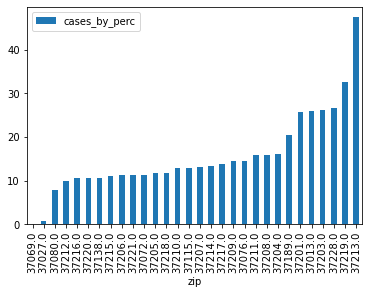

In [39]:
df_all = df_all.sort_values('cases_by_perc')
df_all.plot.bar(x='zip', y='cases_by_perc')

<AxesSubplot:xlabel='zip'>

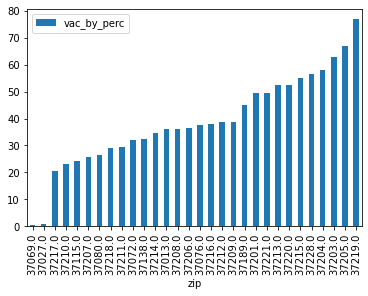

In [40]:
df_all = df_all.sort_values('vac_by_perc')
df_all.plot.bar(x='zip', y='vac_by_perc')

Drop 37069 and 37207 because they are Franklin and Brentwood zipcodes

In [60]:
df_all = df_all.sort_values('vac_by_perc')
df_all_2 = df_all.drop(labels = [0, 1])
df_all_2 = df_all_2.sort_values('vac_by_perc')
df_all_2.zip = df_all_2.zip.astype(int)
df_all_2

,zip,cases,location,pop,pop_den,cases_by_perc,vac_given,vac_by_perc,total_ed,no_ed,...,master_orless,perc_master_orless,professional,perc_professional,professional_orless,perc_professional_orless,doctorate,perc_doctorate,doctorate_orless,perc_doctorate_orless
17,37217,3907,"36.113155, -86.667020",28293.0,1488.46,13.809069,5837.0,20.630545,20580,560,...,20335,98.81,142,0.69,20477,99.50,103,0.50,20580,100
13,37210,2100,"36.149265, -86.732957",16170.0,1747.70,12.987013,3747.0,23.172542,10895,261,...,10639,97.65,162,1.49,10801,99.14,94,0.86,10895,100
14,37115,4574,NaN,35192.0,NaN,12.997272,8520.0,24.210048,27433,633,...,27075,98.70,238,0.87,27313,99.56,120,0.44,27433,100
15,37207,4729,"36.238944, -86.779883",35744.0,1712.06,13.230192,9255.0,25.892457,25832,580,...,25417,98.39,178,0.69,25595,99.08,237,0.92,25832,100
2,37080,574,NaN,7394.0,NaN,7.763051,1970.0,26.643224,5643,141,...,5497,97.41,86,1.52,5583,98.94,60,1.06,5643,100
12,37218,1785,"36.209917, -86.889939",15079.0,367.31,11.837655,4391.0,29.119968,11538,116,...,11304,97.97,138,1.20,11442,99.17,96,0.83,11538,100
20,37211,10233,"36.066734, -86.722609",64753.0,3030.86,15.803129,19175.0,29.612528,52117,1528,...,50666,97.22,811,1.56,51477,98.77,640,1.23,52117,100
10,37072,2984,NaN,26386.0,NaN,11.309028,8460.0,32.062457,22679,256,...,22021,97.10,360,1.59,22381,98.69,298,1.31,22679,100
6,37138,2359,NaN,22160.0,NaN,10.645307,7152.0,32.274368,17007,136,...,16389,96.37,407,2.39,16796,98.76,211,1.24,17007,100
16,37214,3508,"36.197795, -86.673345",26474.0,1260.43,13.250737,9198.0,34.743522,23046,170,...,22548,97.84,277,1.20,22825,99.04,221,0.96,23046,100


<AxesSubplot:xlabel='zip'>

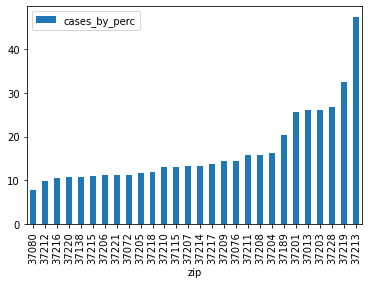

In [61]:
df_all_2 = df_all_2.sort_values('cases_by_perc')
df_all_2.plot.bar(x='zip', y='cases_by_perc')

<AxesSubplot:xlabel='zip'>

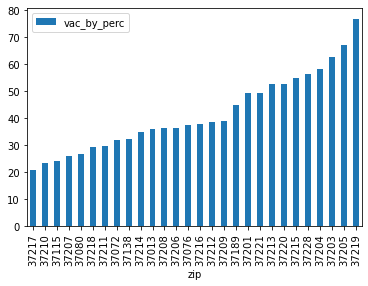

In [62]:
df_all_2 = df_all_2.sort_values('vac_by_perc')
df_all_2.plot.bar(x='zip', y='vac_by_perc')

<AxesSubplot:xlabel='zip'>

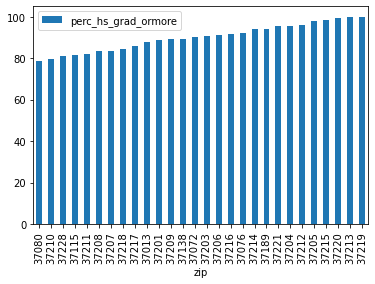

In [63]:
df_all_2 = df_all_2.sort_values('perc_hs_grad_ormore')
df_all_2.plot.bar(x='zip', y='perc_hs_grad_ormore')

<AxesSubplot:xlabel='zip'>

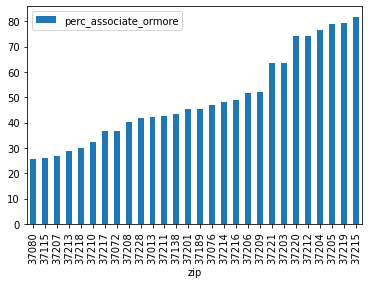

In [64]:
df_all_2 = df_all_2.sort_values('perc_associate_ormore')
df_all_2.plot.bar(x='zip', y='perc_associate_ormore')

Look at vaccines with education level

In [65]:
df_all_2[['cases_by_perc', 'vac_by_perc', 'perc_hs_grad_ormore', 'perc_associate_ormore']].corr()

,cases_by_perc,vac_by_perc,perc_hs_grad_ormore,perc_associate_ormore
cases_by_perc,1.000000,0.482122,0.236664,-0.065362
vac_by_perc,0.482122,1.000000,0.695805,0.752785
perc_hs_grad_ormore,0.236664,0.695805,1.000000,0.752484
perc_associate_ormore,-0.065362,0.752785,0.752484,1.000000


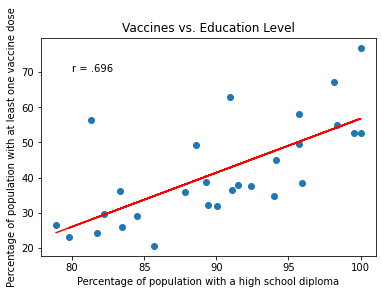

In [80]:
plt.plot('perc_hs_grad_ormore', 'vac_by_perc', marker='o', linestyle='none', data=df_all_2)
plt.title('Vaccines vs. Education Level')
plt.xlabel("Percentage of population with a high school diploma")
plt.ylabel('Percentage of population with at least one vaccine dose')
x = df_all_2['perc_hs_grad_ormore']
y = df_all_2['vac_by_perc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(80, 70, 'r = .696')
plt.savefig('hs_grad_vs_vac.png')

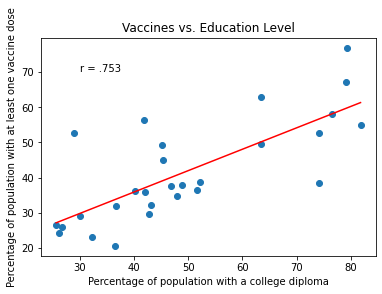

In [67]:
plt.plot('perc_associate_ormore', 'vac_by_perc', marker='o', linestyle='none', data=df_all_2)
plt.title('Vaccines vs. Education Level')
plt.xlabel("Percentage of population with a college diploma")
plt.ylabel('Percentage of population with at least one vaccine dose')
x = df_all_2['perc_associate_ormore']
y = df_all_2['vac_by_perc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(30, 70, 'r = .753')
plt.savefig('col_diploma_vs_vac.png')

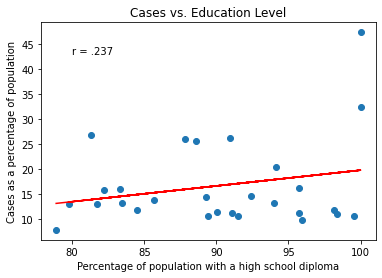

In [68]:
plt.plot('perc_hs_grad_ormore', 'cases_by_perc', marker='o', linestyle='none', data=df_all_2)
plt.title('Cases vs. Education Level')
plt.xlabel("Percentage of population with a high school diploma")
plt.ylabel('Cases as a percentage of population')
x = df_all_2['perc_hs_grad_ormore']
y = df_all_2['cases_by_perc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(80, 43, 'r = .237')
plt.savefig('hs_grad_vs_cases.png')

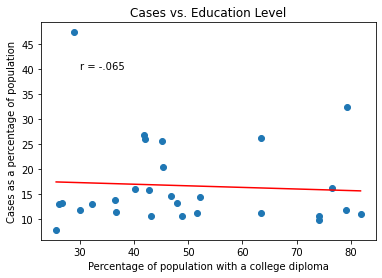

In [69]:
plt.plot('perc_associate_ormore', 'cases_by_perc', marker='o', linestyle='none', data=df_all_2)
plt.title('Cases vs. Education Level')
plt.xlabel("Percentage of population with a college diploma")
plt.ylabel('Cases as a percentage of population')
x = df_all_2['perc_associate_ormore']
y = df_all_2['cases_by_perc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(30, 40, 'r = -.065')
plt.savefig('col_diploma_vs_cases.png')

In [70]:
df_all_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 2 to 7
Data columns (total 73 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zip                       28 non-null     int32  
 1   cases                     28 non-null     int64  
 2   location                  21 non-null     object 
 3   pop                       28 non-null     float64
 4   pop_den                   20 non-null     float64
 5   cases_by_perc             28 non-null     float64
 6   vac_given                 28 non-null     float64
 7   vac_by_perc               28 non-null     float64
 8   total_ed                  28 non-null     int64  
 9   no_ed                     28 non-null     int64  
 10  perc_none                 28 non-null     float64
 11  n_4                       28 non-null     int64  
 12  perc_n_4                  28 non-null     float64
 13  n_4_orless                28 non-null     int64  
 14  perc_n_4_orle

In [71]:
df_ed = df_all_2[['zip', 'perc_none', 'perc_n_4', 'perc_5_6', 'perc_7_8', 'perc_9', 'perc_10', 'perc_11', 'perc_12', 'perc_hs_grad', 'perc_col_<1', 'perc_col_>1', 'perc_associate', 'perc_bachelor', 'perc_master', 'perc_professional', 'perc_doctorate' ]]
df_ed

,zip,perc_none,perc_n_4,perc_5_6,perc_7_8,perc_9,perc_10,perc_11,perc_12,perc_hs_grad,perc_col_<1,perc_col_>1,perc_associate,perc_bachelor,perc_master,perc_professional,perc_doctorate
2,37080,2.50,0.00,1.01,1.79,3.63,5.40,4.64,2.13,33.86,5.95,13.41,6.65,11.86,4.57,1.52,1.06
14,37115,2.31,1.25,2.06,2.20,2.54,2.17,3.65,2.10,33.97,6.11,15.52,7.17,12.48,5.17,0.87,0.44
15,37207,2.25,0.34,1.49,1.78,1.92,2.27,3.69,2.83,34.29,5.98,16.38,5.59,14.50,5.11,0.69,0.92
29,37213,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,71.05,0.00,0.00,0.00,28.95,0.00,0.00,0.00
12,37218,1.01,0.00,0.79,2.42,1.31,3.15,3.73,3.09,28.82,7.25,18.46,5.45,14.66,7.85,1.20,0.83
13,37210,2.40,0.97,2.93,1.51,3.62,2.46,2.93,3.44,29.07,4.57,13.83,5.78,20.18,3.97,1.49,0.86
17,37217,2.72,0.90,1.49,2.78,1.17,1.83,1.62,1.81,28.47,6.24,14.46,6.87,22.22,6.24,0.69,0.50
10,37072,1.13,0.30,0.71,1.56,1.14,1.35,1.88,1.88,29.70,8.59,15.10,7.94,19.26,6.57,1.59,1.31
21,37208,1.71,0.07,0.46,2.42,3.01,2.40,4.18,2.43,23.34,4.54,15.29,2.41,19.12,13.49,2.60,2.54
27,37228,0.00,0.00,0.24,0.00,1.46,11.69,2.92,2.35,21.43,0.00,18.10,2.27,16.96,14.61,4.30,3.65


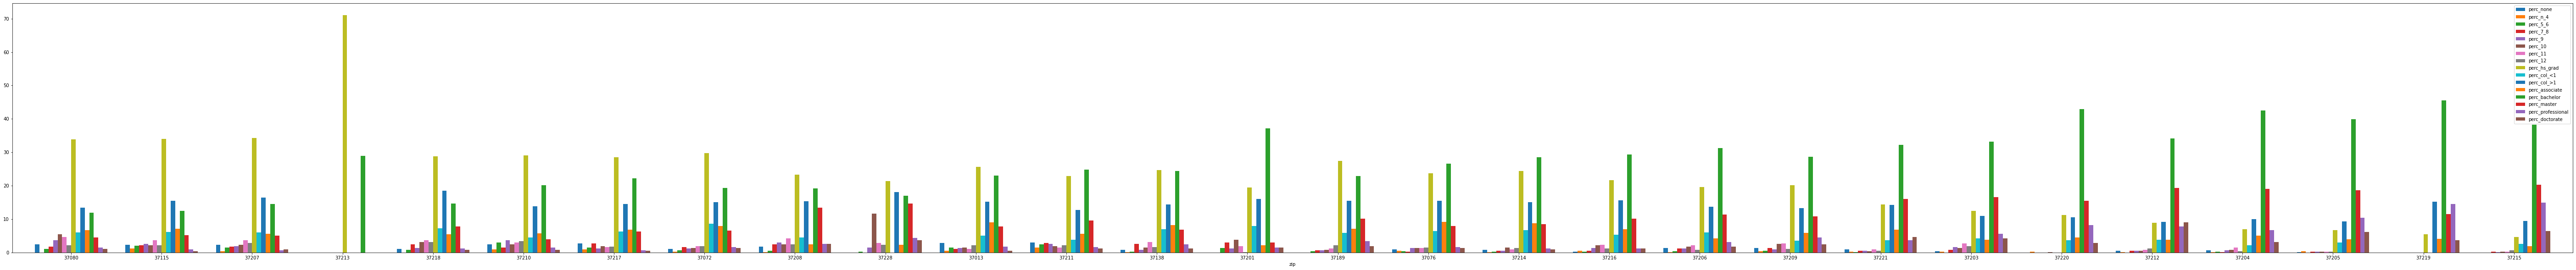

In [72]:
df_ed.plot.bar(x='zip', figsize=(100,10), width = .8)
plt.xticks(rotation = 0)
plt.savefig('ed_attainment_by_zip.png')

Explore geospatial

In [73]:
zipcodes = gpd.read_file('data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


<AxesSubplot:>

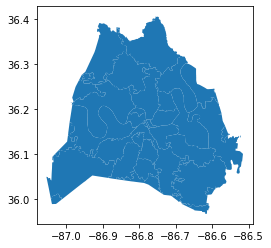

In [74]:
zipcodes.plot()

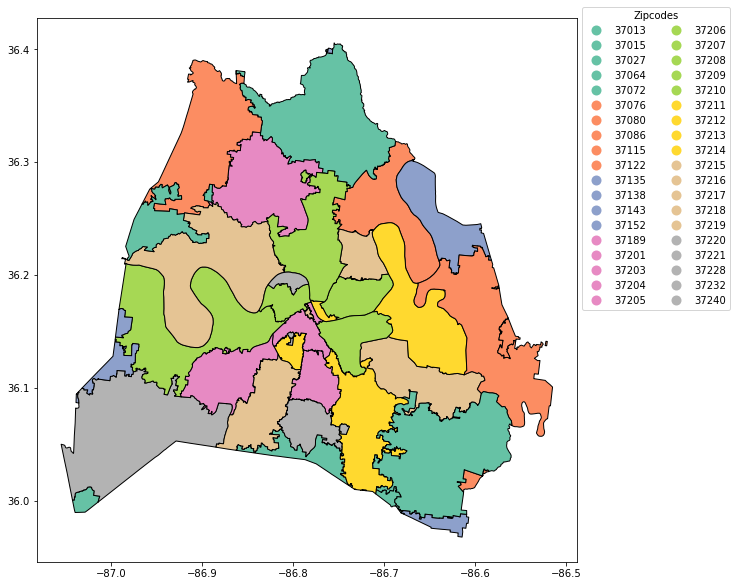

In [75]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [83]:
zipcodes['zip'] = zipcodes['zip'].astype(str)
df_all_2['zip'] = df_all_2['zip'].astype(str)
zipcodes = pd.merge(left = zipcodes, right = df_all_2, left_on = 'zip', right_on = 'zip')

In [84]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   zip                       33 non-null     object  
 1   objectid                  33 non-null     object  
 2   po_name                   33 non-null     object  
 3   shape_stlength            33 non-null     object  
 4   shape_starea              33 non-null     object  
 5   geometry                  33 non-null     geometry
 6   cases                     33 non-null     int64   
 7   location                  22 non-null     object  
 8   pop                       33 non-null     float64 
 9   pop_den                   21 non-null     float64 
 10  cases_by_perc             33 non-null     float64 
 11  vac_given                 33 non-null     float64 
 12  vac_by_perc               33 non-null     float64 
 13  total_ed                  33 non-null     in

In [81]:
geo = gpd.GeoDataFrame(df_all_2, 
                           crs = zipcodes.crs, 
                           geometry = df_all_2['location'])

TypeError: Input must be valid geometry objects: 36.238944, -86.779883